#CUSTOMER CHURN PREDICTION¶
###The aim of this project is to develop a predictive model for customer churn in a subscription-based service or business. Customer churn, or customer attrition, refers to the rate at which customers stop using a service. By analyzing historical customer data and utilizing machine learning algorithms such as Logistic Regression, Random Forests, or Gradient Boosting,aim to predict which customers are likely to churn in the future.



In [113]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [114]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

bank-customer-churn-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [115]:
import zipfile
zip_ref =zipfile.ZipFile('/content/bank-customer-churn-prediction.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [117]:
!pip install seaborn scikit-learn

In [118]:
churn = pd.read_csv('/content/Churn_Modelling.csv')

In [119]:
churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#EDA

In [120]:
churn.shape

(10000, 14)

In [121]:
churn.size

140000

In [122]:
churn.columns = churn.columns.str.strip()

In [123]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [124]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#THere is no null value in churn dataset

In [125]:
churn.duplicated().sum()

0

In [126]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [127]:
churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [128]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: ylabel='count'>

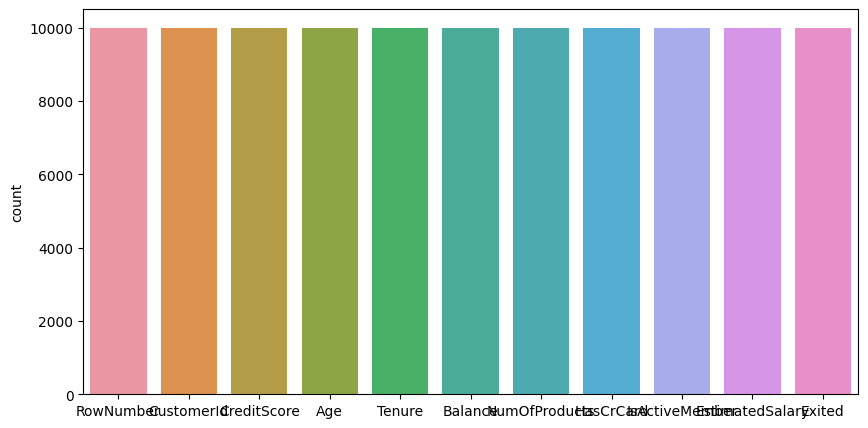

In [129]:
plt.figure(figsize = (10,5))
sns.countplot(data = churn)

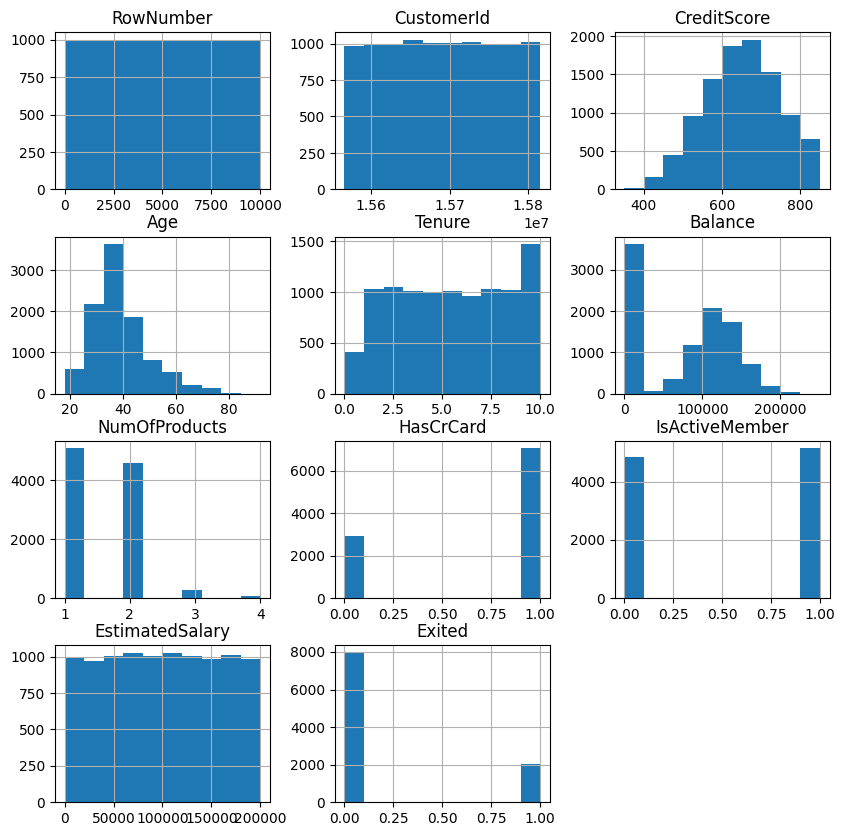

In [130]:
churn.hist(figsize=(10,10))
plt.show()

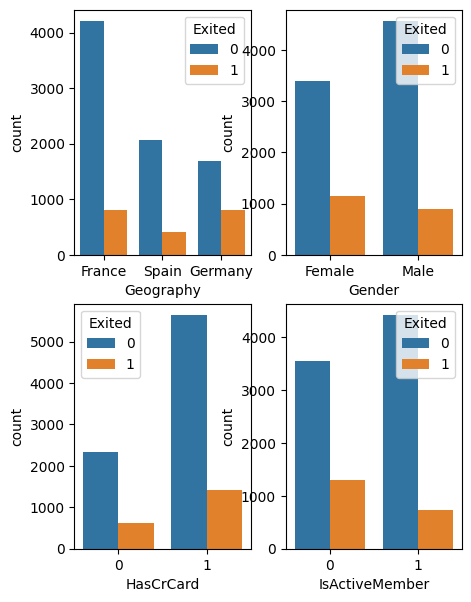

In [131]:
fig, axarr = plt.subplots(2, 2, figsize=(5, 7))
sns.countplot(x='Geography', hue = 'Exited', data = churn, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited' ,data = churn, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = churn, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = churn, ax=axarr[1][1]);

In [132]:
churn['Exited'].value_counts().to_frame()

,Exited
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

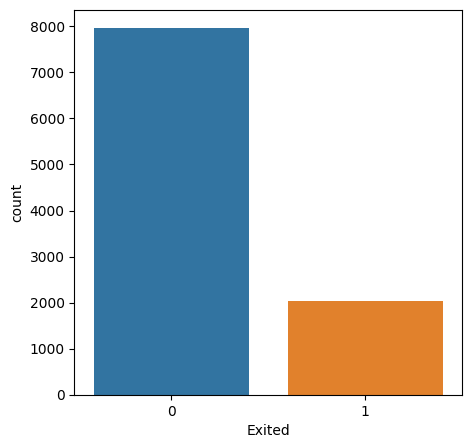

In [133]:
plt.figure(figsize=(5,5))
sns.countplot(data=churn,x='Exited')

###There is an imbalance in the target variable (“Exited”). It is important to eliminate the imbalance.

In [134]:
churn.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [135]:
 from sklearn.utils import resample

In [136]:
churn_majority=churn[churn['Exited']==0]
churn_minority=churn[churn['Exited']==1]

In [137]:
churn_majority_downsample = resample(churn_majority,n_samples = 2037,replace = False, random_state=42)

In [138]:
churn_df=pd.concat([churn_majority_downsample,churn_minority])


In [139]:
churn_df['Exited'].value_counts().to_frame()


,Exited
0,2037
1,2037


<Axes: xlabel='Exited', ylabel='count'>

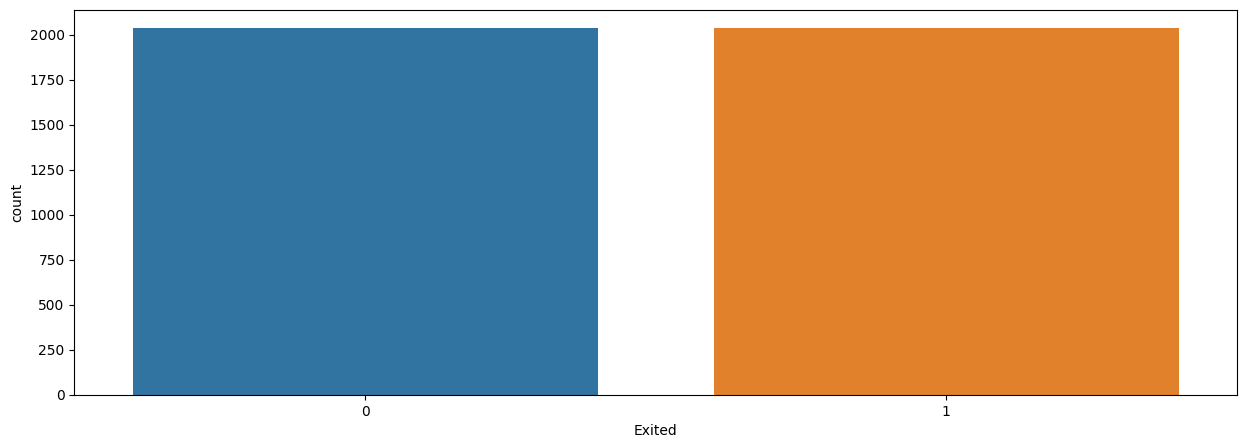

In [140]:

plt.figure(figsize=(15,5))
sns.countplot(data=churn_df,x='Exited')

In [141]:
churn_df.columns


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [142]:
churn_df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
6409,683,France,Female,33,9,0.00,2,1,1,38784.42,0


In [143]:
churn_df['Balance_binary'] = churn_df['Balance'].where(churn_df['Balance'] == 0 , 1)


In [144]:
churn_df['Balance_binary'].value_counts()

1.0    2792
0.0    1282
Name: Balance_binary, dtype: int64

In [145]:
churn_df[['Balance_binary' , 'Exited']].groupby('Balance_binary').mean()

,Exited
Balance_binary,
0.0,0.390016
1.0,0.550501


<ipython-input-146-49c499cf9fad>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churn_df.corr()


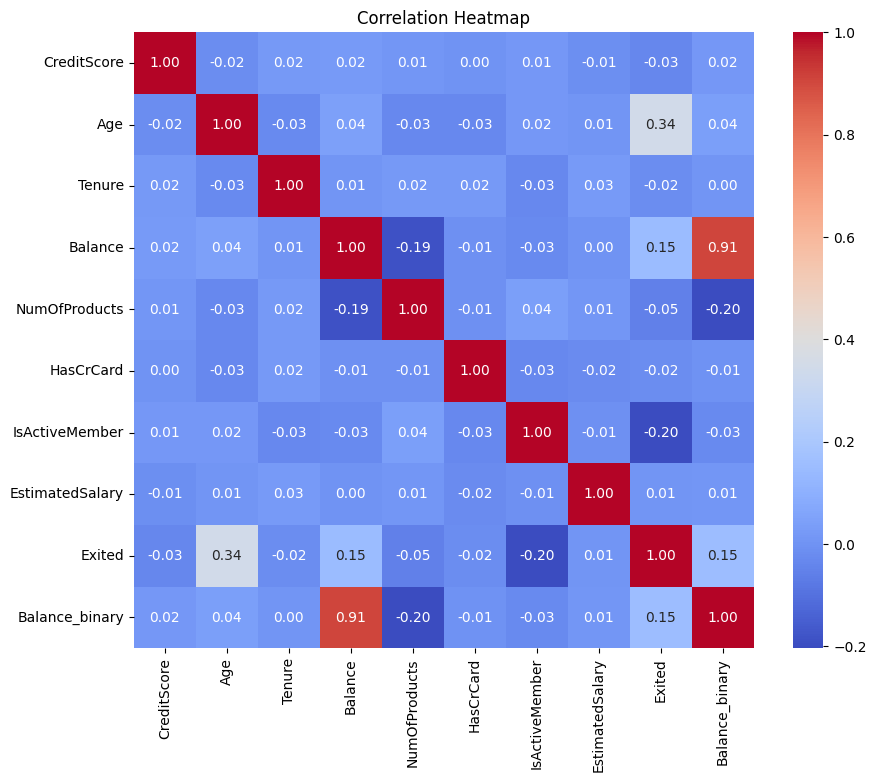

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'churn_df' is your DataFrame
# You can modify this to use the relevant DataFrame
correlation_matrix = churn_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [147]:
df_corr_exit=churn_df.corr()['Exited'].to_frame()


<ipython-input-147-0f9ce62fff6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_exit=churn_df.corr()['Exited'].to_frame()


<Axes: ylabel='Exited'>

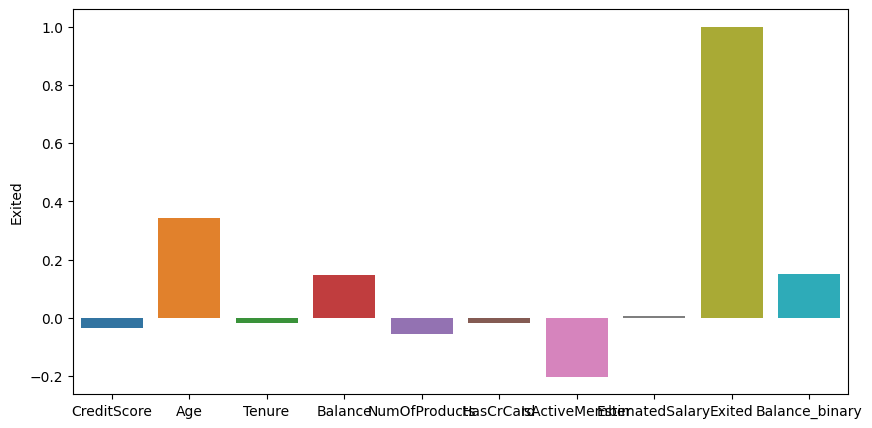

In [148]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='Exited')

###The “Age”, “Balance”, and “Gender” columns are positively correlated with customer churn (“Exited”). There is a negative correlation between being an active member (“IsActiveMember”) and customer churn.


###If you compare “Balance” and “Balance_binary”, you will notice a very strong positive correlation since we created one based on the other.

In [149]:
#Since geograpy and gender columns are
#categorical columns, we have get dummy.

Geography_dum=pd.get_dummies(churn_df['Geography'],drop_first=True)
Gender_dum=pd.get_dummies(churn_df['Gender'],drop_first=True)
df = pd.concat([churn_df,Gender_dum,Geography_dum],axis=1)
df.drop(["Geography","Gender"],axis=1)
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_binary,Male,Germany,Spain
8165,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0,1.0,1,0,1
6409,683,France,Female,33,9,0.00,2,1,1,38784.42,0,0.0,0,0,0
2157,744,France,Female,44,3,0.00,2,1,1,189016.14,0,0.0,0,0,0
1618,697,France,Male,27,8,141223.68,2,1,0,90591.15,0,1.0,1,0,0
1633,562,France,Male,35,7,0.00,1,0,0,48869.67,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,1.0,1,1,0
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,1.0,0,1,0
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1.0,0,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.0,0,0,0


##FEATURE ENGINEERING
###The encoding process is used for machine learning to work better and to get more accurate results

In [150]:
churn_df['AgeBin']=pd.cut(churn_df['Age'],5)
churn_df['BalanceBin']=pd.cut(churn_df['Balance'],5)
churn_df['CreditScoreBin']=pd.cut(churn_df['CreditScore'],5)
churn_df['EstimatedSalaryBin']=pd.cut(churn_df['EstimatedSalary'],5)
churn_df[['AgeBin','Exited']].groupby(['AgeBin'],as_index=False).mean().sort_values(by='AgeBin',ascending=True)
churn_df[['BalanceBin','Exited']].groupby(['BalanceBin'],as_index=False).mean().sort_values(by='BalanceBin',ascending=True)
churn_df[['EstimatedSalaryBin','Exited']].groupby(['EstimatedSalaryBin'],as_index=False).mean().sort_values(by='EstimatedSalaryBin',ascending=True)
churn_df[['CreditScoreBin','Exited']].groupby(['CreditScoreBin'],as_index=False).mean().sort_values(by='CreditScoreBin',ascending=True)

,CreditScoreBin,Exited
0,"(349.5, 450.0]",0.628866
1,"(450.0, 550.0]",0.529310
2,"(550.0, 650.0]",0.501091
3,"(650.0, 750.0]",0.481241
4,"(750.0, 850.0]",0.492138


###We do the label encoding to standardize the stand with the gap between estimate salary and age

#Label Encoding

In [151]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
churn_df['AgeCode']=le.fit_transform(churn_df['AgeBin'])
churn_df['BalanceCode']=le.fit_transform(churn_df['BalanceBin'])
churn_df['CreditScoreCode']=le.fit_transform(churn_df['CreditScoreBin'])
churn_df['EstimatedSalaryCode']=le.fit_transform(churn_df['EstimatedSalaryBin'])
churn_df.drop(['AgeBin','BalanceBin','CreditScoreBin','EstimatedSalaryBin','CreditScore','Age','Balance','EstimatedSalary'],inplace=True,axis=1)

In [156]:

churn_df.drop(['Geography','Gender'],axis=1,inplace=True)

In [157]:
churn_df.head(2)

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Balance_binary,AgeCode,BalanceCode,CreditScoreCode,EstimatedSalaryCode
8165,8,2,1,0,0,1.0,1,3,2,2
6409,9,2,1,1,0,0.0,1,0,3,0


##Selecting Target varibale and features

In [158]:
x=churn_df.drop(['Exited'],axis=1)
y=churn_df['Exited']

##Split data into train set ana test set

In [159]:
from sklearn.model_selection import train_test_split


In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.20,random_state=42)

In [166]:
#check the shape for testing set and training set

x_train.shape



(3259, 9)

In [167]:
x_test.shape

(815, 9)

###We can apply different algorithms;

Random Forest

Naive Bayes

KNN

Logistic Regression

Support Vector Machines

Perceptron

Decision Tree


#Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression

#initial model object

logistic_model=LogisticRegression(max_iter=500)


logistic_model.fit(x_train,y_train)


LogisticRegression(max_iter=500)

In [170]:
logistic_model.score(x_train,y_train)


0.6618594660938938

##Model prediction

In [172]:
y_pred=logistic_model.predict(x_test)
print(y_pred)


[1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1
 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1
 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 1 1 0 1 1 0 0 1 

In [201]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Precision Score is:", precision)
print("Recall Score is:", recall)
print(f'Accuracy Score is:{round(accuracy, 4)* 100}')
print("F1 Score is:", f1)
print("Confusion Matrix:")
print(confusion_matrix_result)


Precision Score is: 0.6318537859007833
Recall Score is: 0.6505376344086021
Accuracy Score is:66.75
F1 Score is: 0.6410596026490065
Confusion Matrix:
[[302 141]
 [130 242]]


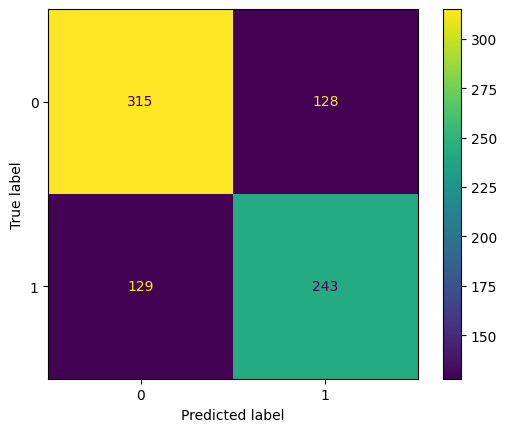

In [178]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=logistic_model.classes_),display_labels=logistic_model.classes_)
cmd.plot()

In [180]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [181]:
knn.score(x_train,y_train)


0.8192697146363915

In [182]:
knn.score(x_test,y_test)

0.6674846625766871

##KNN model Prediction

In [184]:
y_knn_pred=knn.predict(x_test)
print(y_knn_pred)

[1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0
 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1
 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 1 1 1 0 1 0 0 1 

In [200]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay


precision = precision_score(y_test, y_knn_pred)
recall = recall_score(y_test, y_knn_pred)
accuracy = accuracy_score(y_test, y_knn_pred)
f1 = f1_score(y_test, y_knn_pred)
confusion_matrix_result = confusion_matrix(y_test, y_knn_pred)

print("Precision Score is:", precision)
print("Recall Score is:", recall)
print(f'Accuracy Score is:{round(accuracy, 4)* 100}')
print("F1 Score is:", f1)
print("Confusion Matrix:")
print(confusion_matrix_result)


Precision Score is: 0.6318537859007833
Recall Score is: 0.6505376344086021
Accuracy Score is:66.75
F1 Score is: 0.6410596026490065
Confusion Matrix:
[[302 141]
 [130 242]]


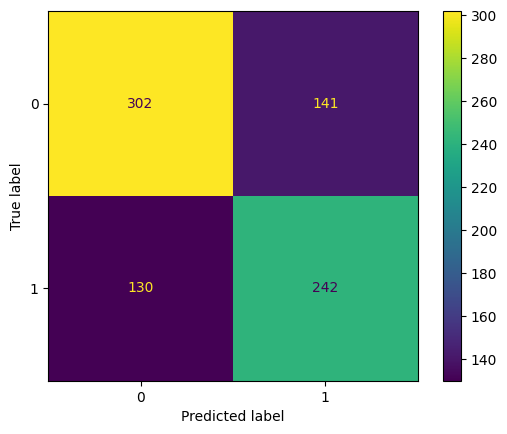

In [186]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_knn_pred,labels=knn.classes_),display_labels=knn.classes_)
cmd.plot()

#SVC model

In [187]:
from sklearn.svm import SVC

svc=SVC()

svc.fit(x_train,y_train)


SVC()

In [188]:
svc.score(x_train,y_train)


0.7124884934028843

In [189]:
svc.score(x_test,y_test)


0.7092024539877301

#SVC prediction

In [190]:
y_svc_pred=svc.predict(x_test)
print(y_svc_pred)

[1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1
 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0
 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1
 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 

In [199]:

precision = precision_score(y_test, y_svc_pred)
recall = recall_score(y_test, y_svc_pred)
accuracy = accuracy_score(y_test, y_svc_pred)
f1 = f1_score(y_test, y_svc_pred)
confusion_matrix_result = confusion_matrix(y_test, y_svc_pred)

print("Precision Score is:", precision)
print("Recall Score is:", recall)
print(f'Accuracy Score is:{round(accuracy, 4)* 100}')
print("F1 Score is:", f1)
print("Confusion Matrix:")
print(confusion_matrix_result)


Precision Score is: 0.6610978520286396
Recall Score is: 0.7446236559139785
Accuracy Score is:70.92
F1 Score is: 0.7003792667509482
Confusion Matrix:
[[301 142]
 [ 95 277]]


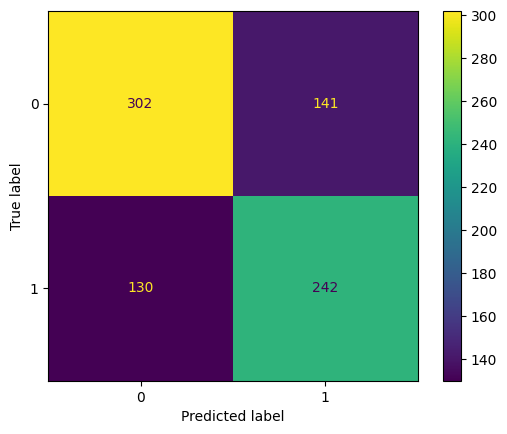

In [192]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=svc.classes_),display_labels=svc.classes_)
cmd.plot()

The training scores and test scores of our models are very close to each other, except for the Random Forest and Decision Tree algorithms. This is what we want! As you build many classification models over time, you will often see Decision Trees come to the fore as model success.

 However, one of the most important features that we should pay attention to in these algorithms is that they are very prone to Overfitting as we have seen in our problem.


We also made sure that there was no problem by doing crossvalidation.



In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


random_forest = RandomForestClassifier(n_estimators=10, random_state=42)  # You can specify the number of trees (n_estimators) and a random state for reproducibility

random_forest.fit(x_train, y_train)



RandomForestClassifier(n_estimators=10, random_state=42)

In [196]:
y_forest_pred = random_forest.predict(x_test)


In [207]:
from sklearn.metrics import classification_report

scores_accuracy =cross_val_score(random_forest, x_train, y_train, cv =10 , scoring = "accuracy")

precision = precision_score(y_test, y_forest_pred)
recall = recall_score(y_test, y_forest_pred)
# accuracy = accuracy_score(y_test,y_forest_pred)
f1 = f1_score(y_test,y_forest_pred)
confusion_matrix_result = confusion_matrix(y_test, y_forest_pred)

print("Precision Score is:", precision)

print("Recall Score is:", recall)

print("Accuracy Score is:",scores_accuracy)
print("F1 Score is:", f1)

print('\n classification report :\n', classification_report(y_test, y_forest_pred))

print("Confusion Matrix:")
print(confusion_matrix_result)

Precision Score is: 0.6818181818181818
Recall Score is: 0.6451612903225806
Accuracy Score is: [0.71165644 0.67484663 0.74233129 0.66564417 0.66871166 0.63803681
 0.66564417 0.70245399 0.69631902 0.72      ]
F1 Score is: 0.6629834254143646

 classification report :
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       443
           1       0.68      0.65      0.66       372

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815

Confusion Matrix:
[[331 112]
 [132 240]]


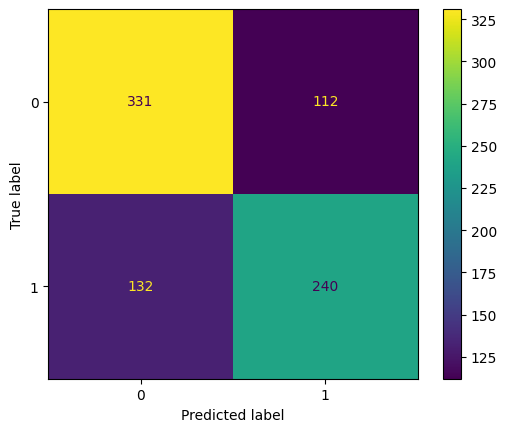

In [208]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_forest_pred,labels=random_forest.classes_),display_labels=random_forest.classes_)
cmd.plot()